### Import libraries

In [32]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
pd.set_option("display.max_columns",None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import pickle
from IPython.display import display

import os
for dirname,_,filenames in os.walk("input"):
    for filename in filenames:
        print(os.path.join(dirname,filename))

input/images_features.csv


### Data loading

In [6]:
df=pd.read_csv("input/images_features.csv")
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,label
0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,60.451454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.349785,0.0,0.0,3.168928,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,16.311247,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,7.929829,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,7
1,0.0,0.0,1.036779,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.014730,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3.802685,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.265593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.693143,0.0,0.0,0.0,0.0,0.0,0.0,9.514944,0.0,4.573834,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,46.741096,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,41.385525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,32.079967,0.0,0.0,0.0,6
2,0.0,0.0,1.417818,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.831647,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.896445,0.0,0.0,0.0,0.0,0.0,0.0,47.654045,0.0,17.385500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,43.184853,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,29.454855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,43.581966,0.0,0.0,0.0,6
3,0.0,0.0,0.000000,0.826438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,3.950654,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.028241,11.227303,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.828163,0.0,0.924111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.059985,0.0,0.0,0.0,0.0,0.0,0.0,4.280267,0.0,11.495129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,1.350657,0.0,0.0,0.0,0.0,0.0,2.820139,0.0,0.0,22.268438,0.0,0.0,0.000000,0.0,9.734729,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.

In [8]:
df.shape

(11184, 129)

### Data preprocessing

In [7]:
class_labels=os.listdir('dataset')
print(class_labels)

['Fusobacterium', 'Porfyromonas.gingivalis', 'Lactobacillus.casei', 'Veionella', 'Listeria.monocytogenes', 'Candida.albicans', 'Clostridium.perfringens', 'Lactobacillus.paracasei', 'Actinetobacter.israeli', 'Acinetobacter.baumanii']


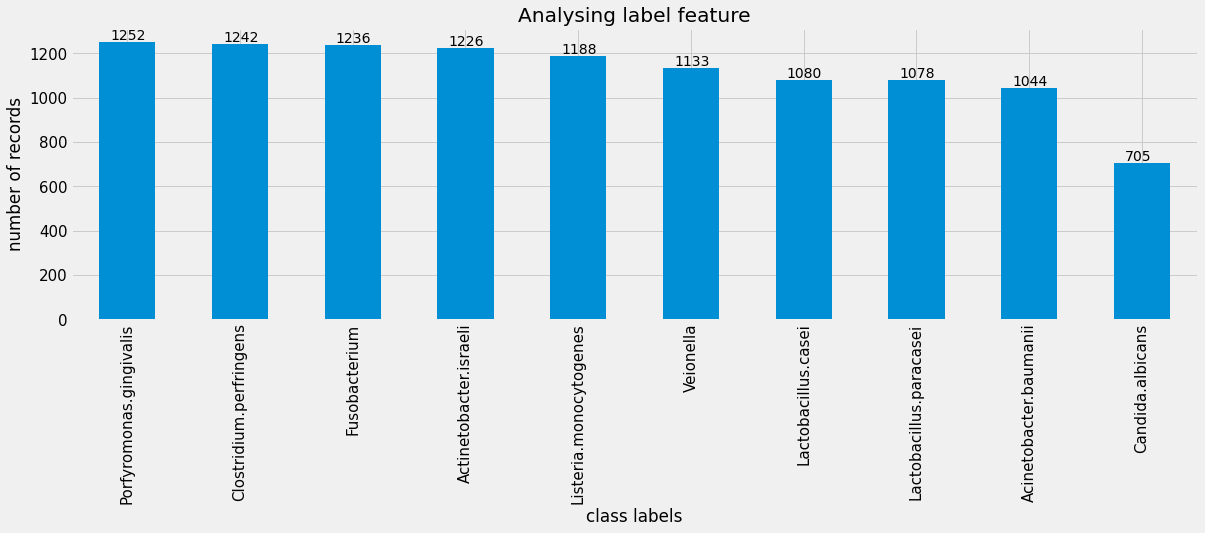

In [41]:
str_labels=[]
for label in df['label'].values:
    str_labels.append(class_labels[label])
df['str_labels']=str_labels

with plt.style.context(style='fivethirtyeight'):
    ax=df['str_labels'].value_counts().plot.bar(figsize=(18,5),
                                           fontsize=15,
                                           title='Analysing label feature',
                                           xlabel='class labels',
                                           ylabel='number of records')
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.10, p.get_height()+10))
    plt.show()

In [14]:
df=df.drop(labels='str_labels',axis=1)
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,label
0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,60.451454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.349785,0.0,0.0,3.168928,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,16.311247,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,7.929829,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,7
1,0.0,0.0,1.036779,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.014730,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3.802685,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.265593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.693143,0.0,0.0,0.0,0.0,0.0,0.0,9.514944,0.0,4.573834,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,46.741096,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,41.385525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,32.079967,0.0,0.0,0.0,6
2,0.0,0.0,1.417818,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.831647,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.896445,0.0,0.0,0.0,0.0,0.0,0.0,47.654045,0.0,17.385500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,43.184853,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,29.454855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,43.581966,0.0,0.0,0.0,6
3,0.0,0.0,0.000000,0.826438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,3.950654,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.028241,11.227303,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.828163,0.0,0.924111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.059985,0.0,0.0,0.0,0.0,0.0,0.0,4.280267,0.0,11.495129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,1.350657,0.0,0.0,0.0,0.0,0.0,2.820139,0.0,0.0,22.268438,0.0,0.0,0.000000,0.0,9.734729,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.

In [15]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1:]

In [16]:
X.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128
0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,60.451454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.349785,0.0,0.0,3.168928,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,16.311247,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,7.929829,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,1.036779,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.014730,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3.802685,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.265593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.693143,0.0,0.0,0.0,0.0,0.0,0.0,9.514944,0.0,4.573834,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,46.741096,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,41.385525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,32.079967,0.0,0.0,0.0
2,0.0,0.0,1.417818,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.831647,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.896445,0.0,0.0,0.0,0.0,0.0,0.0,47.654045,0.0,17.385500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,43.184853,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,29.454855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,43.581966,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.826438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,3.950654,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.028241,11.227303,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.828163,0.0,0.924111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.059985,0.0,0.0,0.0,0.0,0.0,0.0,4.280267,0.0,11.495129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,1.350657,0.0,0.0,0.0,0.0,0.0,2.820139,0.0,0.0,22.268438,0.0,0.0,0.000000,0.0,9.734729,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [17]:
y.head()

,label
0,7
1,6
2,6
3,4
4,2


### Data splitting

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True,stratify=y)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(8947, 128) (2237, 128) (8947, 1) (2237, 1)


In [21]:
X_train.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128
8321,0.0,0.0,33.831753,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.854219,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,3.460575,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.464606,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3.240348,0.0,0.0,0.0,0.0,0.0,22.965729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.878656,0.000000,27.888460,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.890972,0.0,0.0,0.000000,0.0,14.672814,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
5707,0.0,0.0,35.566673,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.328955,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,2.069202,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.529189,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,4.899925,0.0,0.0,0.0,0.0,0.0,28.895401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,26.597628,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.305336,0.0,0.0,0.000000,0.0,17.936900,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
6329,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,54.43013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,22.344471,0.000000,0.000000,4.558073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,14.150807,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,7.282598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
300,0.0,0.0,42.889233,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.780428,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,2.855129,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.178744,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,7.161227,0.0,0.0,0.0,0.0,0.0,33.540924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,32.220093,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.461037,0.0,0.0,0.000000,0.0,22.287378,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
5916,0.0,0.0,0.000000,0.0,0.0,0.0,1.875221,0.0,0.0,2.98365,0.0,0.0,0.0,0.0,

In [22]:
X_test.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128
2460,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,6.20561,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,15.417122,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,13.083789,0.0,0.0,0.0,0.0,0.0,19.979040,0.0,0.0,0.0,0.0,30.196661,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.181794,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.303918,0.0,0.0,0.0
6729,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,41.269646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.536348,0.0,0.000000,1.727304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,11.634728,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,3.209702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2845,0.0,0.0,0.000000,0.0,0.0,0.0,18.340405,0.0,0.0,4.559688,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,2.309363,0.0,0.0,0.0,0.0,0.0,0.000000,10.868334,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.155800,0.0,0.0,0.0,0.0,0.0,6.436018,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,13.374322,3.520841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.119017,2.193526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,11.814541,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.087727,0.0,0.0,0.0
785,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.762641,0.0,0.0,0.0,0.0,0.0,18.960041,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,9.343577,18.368700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,6.433115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.454622,0.0,0.0,6.354603,0.0,0.0,39.774190,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [23]:
y_train.head()

,label
8321,3
5707,3
6329,7
300,3
5916,1


In [24]:
y_test.head()

,label
2460,4
6729,7
2845,1
785,8
8612,9


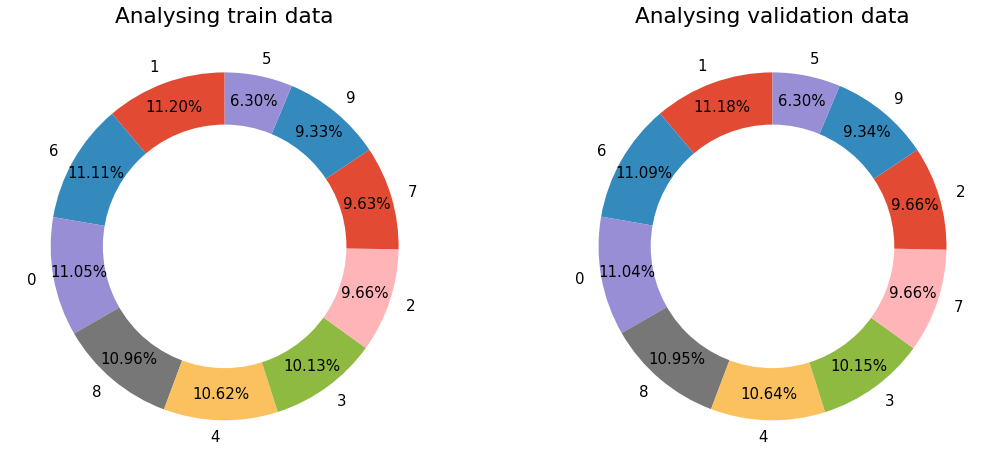

In [45]:
with plt.style.context(style='ggplot'):
    plt.figure(figsize=(18,8))
    plt.rcParams['font.size']=15
    plt.subplot(121)
    plt.pie(x=dict(y_train['label'].value_counts()).values(),
            labels=dict(y_train['label'].value_counts()).keys(),
            autopct='%.2f%%',
            pctdistance=0.85,
            startangle=90)
    centre_circle=plt.Circle((0,0),0.7,fc='white')
    fig=plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(label='Analysing train data')
    plt.subplot(122)
    plt.pie(x=dict(y_test['label'].value_counts()).values(),
            labels=dict(y_test['label'].value_counts()).keys(),
            autopct='%.2f%%',
            pctdistance=0.85,
            startangle=90)
    plt.title(label='Analysing validation data')
    centre_circle=plt.Circle((0,0),0.7,fc='white')
    fig=plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.show()

### RandomForestClassifier

In [25]:
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier()
RF_model.fit(X_train.values,y_train['label'].values)

RandomForestClassifier()

In [26]:
RF_pred=RF_model.predict(X_test.values)
print(RF_pred)

[4 7 1 ... 8 8 7]


### Result Analysis

***Accuracy Score***

In [29]:
RF_accuracy=accuracy_score(y_true=y_test['label'].values,y_pred=RF_pred)
print(f"Validation accuracy of RandomForestClassifier model is {RF_accuracy*100.0:.2f}%")

Validation accuracy of RandomForestClassifier model is 99.11%


***Classification Report***

In [31]:
print(classification_report(y_true=y_test['label'].values,y_pred=RF_pred,target_names=class_labels))

                         precision    recall  f1-score   support

          Fusobacterium       0.98      1.00      0.99       247
Porfyromonas.gingivalis       0.98      0.98      0.98       250
    Lactobacillus.casei       1.00      1.00      1.00       216
              Veionella       0.98      0.97      0.98       227
 Listeria.monocytogenes       1.00      1.00      1.00       238
       Candida.albicans       0.99      1.00      0.99       141
Clostridium.perfringens       1.00      0.98      0.99       248
Lactobacillus.paracasei       1.00      1.00      1.00       216
 Actinetobacter.israeli       0.99      1.00      0.99       245
 Acinetobacter.baumanii       1.00      0.99      0.99       209

               accuracy                           0.99      2237
              macro avg       0.99      0.99      0.99      2237
           weighted avg       0.99      0.99      0.99      2237



***Confusion Matrix***

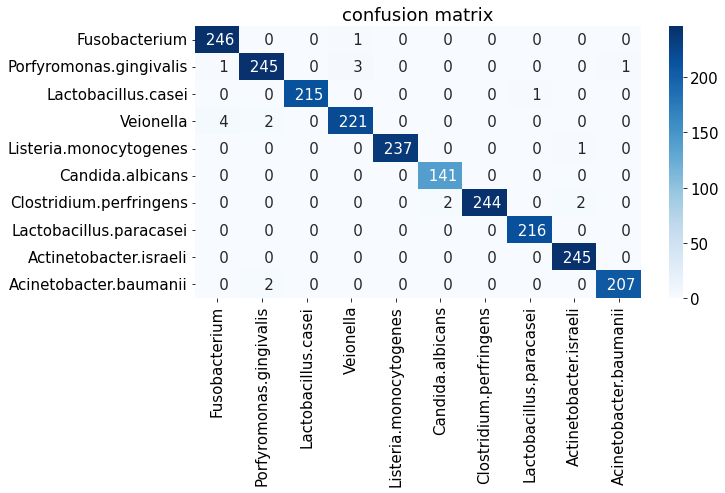

In [36]:
plt.figure(figsize=(10,5))
plt.rcParams['font.size']=15
ax=sns.heatmap(data=confusion_matrix(y_true=y_test['label'].values,y_pred=RF_pred),
               annot=True,
               fmt='4d',
               xticklabels=class_labels,
               yticklabels=class_labels,
               cmap=plt.cm.Blues)
plt.title(label='confusion matrix')
plt.show()

In [37]:
with open(file='model/RandomForestClassifier_model.pkl',mode='wb') as file:
    pickle.dump(obj=RF_model,file=file)